In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Import Data

# id	Unique ID for the customer
Gender	Gender of the customer
Age
Age of the customer
Driving_License	0 : Customer does not have DL, 1 : Customer already has DL
Region_Code	Unique code for the region of the customer
Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age	Age of the Vehicle 
Vehicle_Damage
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium	The amount customer needs to pay as premium in the year
Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage	Number of Days, Customer has been associated with the company
Response	1 :  Customer is interested, 0 : Customer is not interested


In [2]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [22]:
sub_id = test_set['id'].copy()

In [23]:
sub_id.shape

(127037,)

In [3]:
train_set.shape

(381109, 12)

In [4]:
test_set.shape

(127037, 11)

In [5]:
train_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
train_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
test_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
id                      127037 non-null int64
Gender                  127037 non-null object
Age                     127037 non-null int64
Driving_License         127037 non-null int64
Region_Code             127037 non-null float64
Previously_Insured      127037 non-null int64
Vehicle_Age             127037 non-null object
Vehicle_Damage          127037 non-null object
Annual_Premium          127037 non-null float64
Policy_Sales_Channel    127037 non-null float64
Vintage                 127037 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


## Checking for missing values

In [11]:
train_set.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
test_set.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

## EDA

In [14]:
train_set['id'].unique().sum()

72622225495

In [15]:
test_set['id'].unique().sum()

56484207236

Observation :

Since id is a unique id given to customer we can drop them. 

In [24]:
train_set.drop(['id'], axis = 1, inplace = True)

In [25]:
test_set.drop(['id'], axis = 1, inplace = True)

In [26]:
train_set.shape

(381109, 11)

In [27]:
test_set.shape

(127037, 10)

## Ploting categorical data

In [29]:
train_set['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

Text(0, 0.5, 'count')

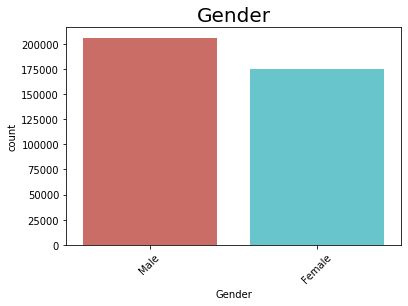

In [31]:
sns.countplot(x='Gender',data=train_set, palette='hls')
plt.title('Gender', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel('count')

In [30]:
test_set['Gender'].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

Text(0, 0.5, 'count')

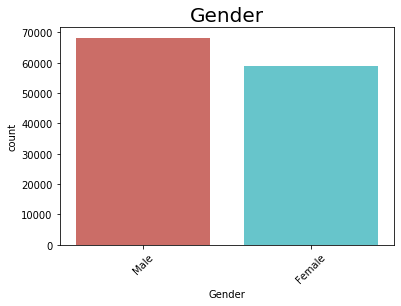

In [32]:
sns.countplot(x='Gender',data=test_set, palette='hls')
plt.title('Gender', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel('count')

In [33]:
train_set['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Text(0, 0.5, 'count')

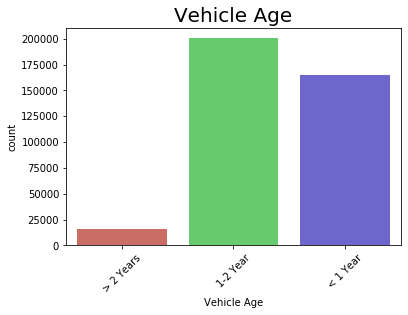

In [36]:
sns.countplot(x='Vehicle_Age',data=train_set, palette='hls')
plt.title('Vehicle Age', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Vehicle Age")
plt.ylabel('count')

In [35]:
test_set['Vehicle_Age'].value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

Text(0, 0.5, 'count')

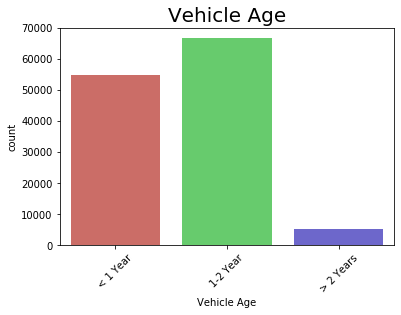

In [37]:
sns.countplot(x='Vehicle_Age',data=test_set, palette='hls')
plt.title('Vehicle Age', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Vehicle Age")
plt.ylabel('count')

In [38]:
train_set['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Text(0, 0.5, 'count')

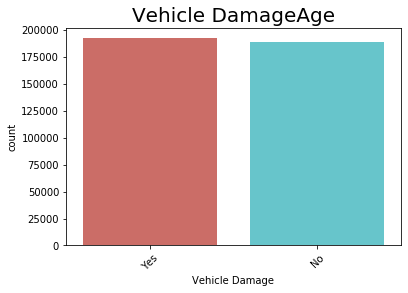

In [40]:
sns.countplot(x='Vehicle_Damage',data=train_set, palette='hls')
plt.title('Vehicle DamageAge', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Vehicle Damage")
plt.ylabel('count')

In [41]:
test_set['Vehicle_Damage'].value_counts()

Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64

Text(0, 0.5, 'count')

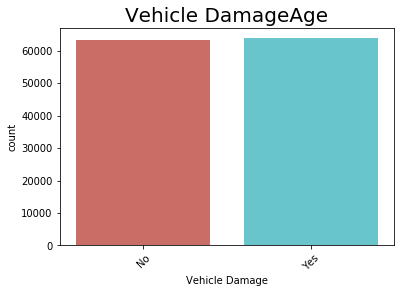

In [42]:
sns.countplot(x='Vehicle_Damage',data=test_set, palette='hls')
plt.title('Vehicle Damage', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Vehicle Damage")
plt.ylabel('count')

## Ploting Numerical Value

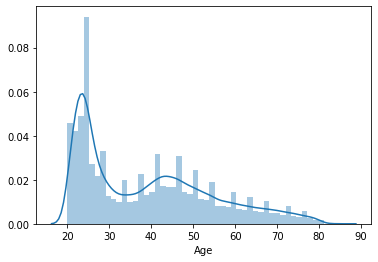

In [43]:
sns.distplot(train_set['Age'])

In [45]:
train_set['Driving_License'].unique()

array([1, 0], dtype=int64)

In [46]:
train_set['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Text(0, 0.5, 'count')

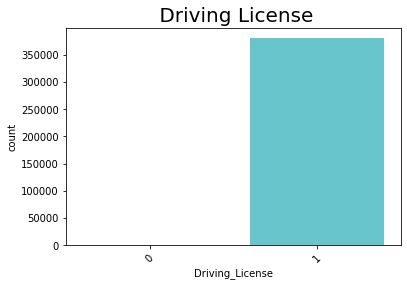

In [47]:
sns.countplot(x='Driving_License',data=train_set, palette='hls')
plt.title(' Driving License', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Driving_License")
plt.ylabel('count')

In [48]:
test_set['Driving_License'].value_counts()

1    126800
0       237
Name: Driving_License, dtype: int64

Text(0, 0.5, 'count')

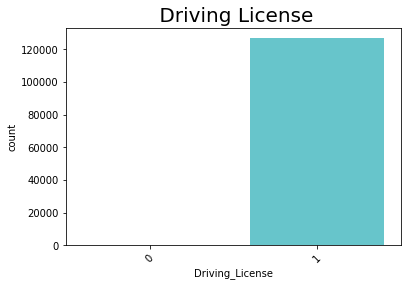

In [49]:
sns.countplot(x='Driving_License',data=test_set, palette='hls')
plt.title(' Driving License', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Driving_License")
plt.ylabel('count')

In [50]:
train_set['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

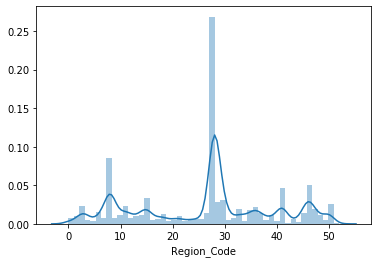

In [52]:
sns.distplot(train_set['Region_Code'])

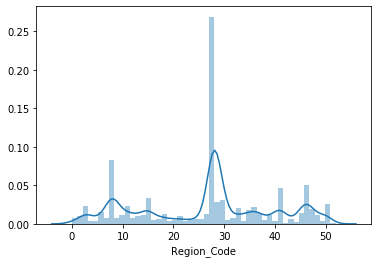

In [53]:
sns.distplot(test_set['Region_Code'])

1 : Customer already has Vehicle Insurance
0 : Customer doesn't have Vehicle Insurance

In [55]:
train_set['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

Text(0, 0.5, 'count')

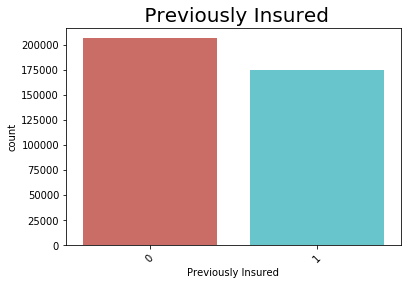

In [56]:
sns.countplot(x='Previously_Insured',data=train_set, palette='hls')
plt.title(' Previously Insured', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Previously Insured")
plt.ylabel('count')

In [57]:
test_set['Previously_Insured'].value_counts()

0    68595
1    58442
Name: Previously_Insured, dtype: int64

Text(0, 0.5, 'count')

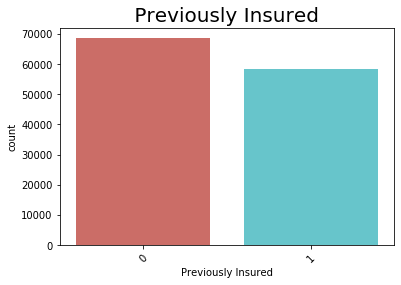

In [58]:
sns.countplot(x='Previously_Insured',data=test_set, palette='hls')
plt.title(' Previously Insured ', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Previously Insured")
plt.ylabel('count')

In [59]:
train_set['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

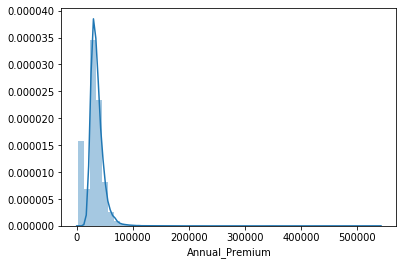

In [60]:
sns.distplot(train_set['Annual_Premium'])

In [62]:
test_set['Annual_Premium'].unique()

array([35786., 33762., 40050., ..., 52304., 32918., 62875.])

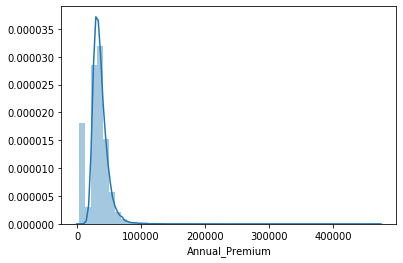

In [61]:
sns.distplot(test_set['Annual_Premium'])

In [63]:
train_set['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

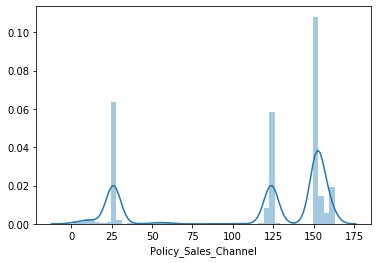

In [64]:
sns.distplot(train_set['Policy_Sales_Channel'])

In [65]:
test_set['Annual_Premium'].unique()

array([35786., 33762., 40050., ..., 52304., 32918., 62875.])

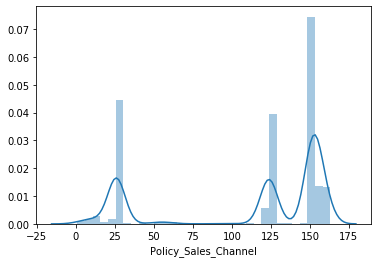

In [66]:
sns.distplot(test_set['Policy_Sales_Channel'])

In [68]:
train_set['Vintage'].unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

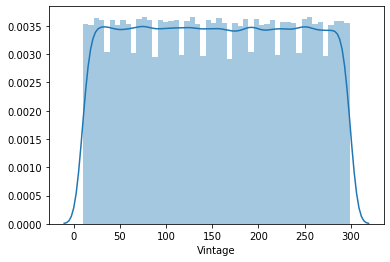

In [72]:
sns.distplot(train_set['Vintage'])

In [69]:
test_set['Vintage'].unique()

array([ 53, 111, 199, 187, 297, 266, 107, 232, 277, 133,  91, 254,  29,
        22, 169, 270, 207, 141,  35, 293,  78, 177,  73, 201, 153, 126,
       230, 256, 113, 257, 288, 273, 246, 118, 291, 198, 204, 249, 129,
        67,  11, 272, 168, 217,  32, 105, 221, 140, 218, 260,  45,  16,
        94,  60, 110, 234, 244, 239, 255, 171, 163, 158, 192,  83, 224,
        24, 193,  26, 235, 195, 209, 220, 137, 271,  30, 268, 243, 130,
       180, 226,  70, 283, 251,  49, 241, 275, 231, 242, 290, 280,  85,
        41,  93, 250, 146, 176, 135, 186,  55,  13, 188, 114, 160,  63,
       175, 205, 123, 237,  87,  80, 148, 200, 194,  18, 138, 233, 296,
        68, 219, 211,  44, 117, 279,  57, 203, 173,  52, 116,  33,  61,
        62, 147,  90, 167, 212, 247, 143, 100,  21, 183,  12,  25, 208,
        43, 253, 161,  39,  59,  86, 125,  51, 112, 264,  76, 222,  50,
       274,  47,  36, 122,  56, 265, 210,  88,  98, 156, 227, 206, 298,
        17,  82, 120, 119, 289, 115, 103,  96,  20, 149, 121,  6

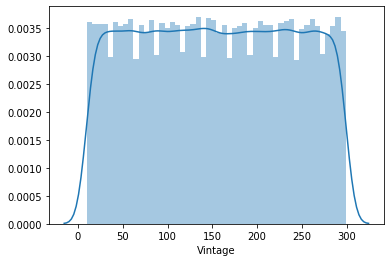

In [71]:
sns.distplot(test_set['Vintage'])

1 - Interested
0 - Not Interested

In [73]:
train_set['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Text(0, 0.5, 'count')

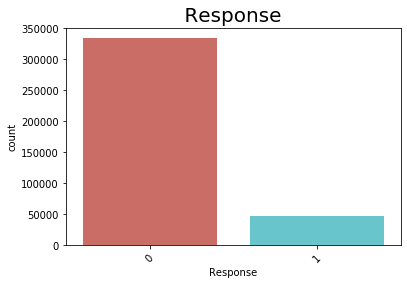

In [74]:
sns.countplot(x='Response',data=train_set, palette='hls')
plt.title(' Response ', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Response")
plt.ylabel('count')

## Bivariate Analysis

Text(0, 0.5, 'Driving License')

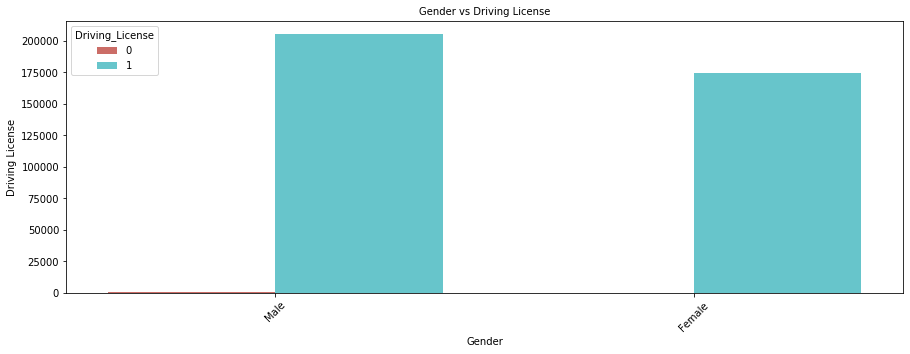

In [75]:
plt.subplots(figsize=(15,5))
sns.countplot(x='Gender',data=train_set, palette='hls',hue= "Driving_License")
plt.title('Gender vs Driving License', fontsize = 10)
plt.xticks(rotation = 45)
plt.xlabel('Gender')
plt.ylabel('Driving License')

Text(0, 0.5, 'Previously Insured')

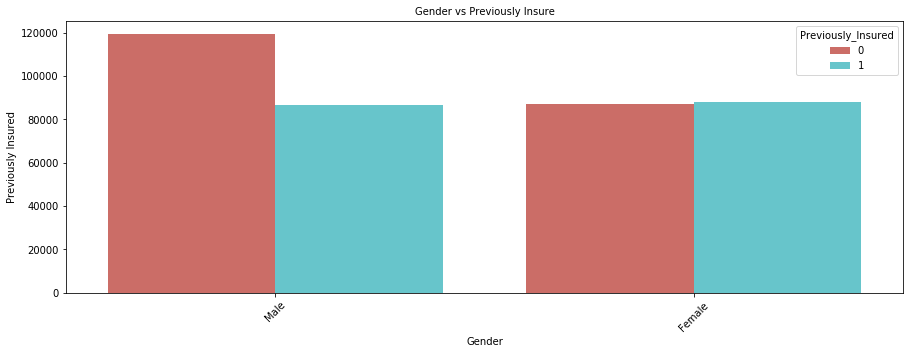

In [79]:
plt.subplots(figsize=(15,5))
sns.countplot(x='Gender',data=train_set, palette='hls',hue= "Previously_Insured")
plt.title('Gender vs Previously Insure', fontsize = 10)
plt.xticks(rotation = 45)
plt.xlabel('Gender')
plt.ylabel('Previously Insured')

Text(0, 0.5, 'Vehicle Damage')

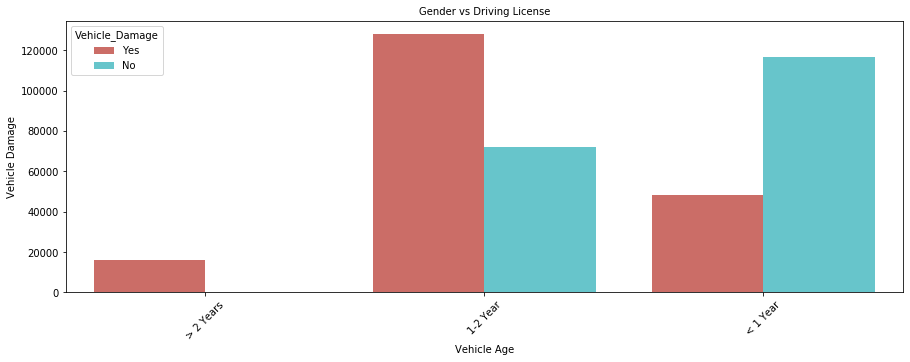

In [80]:
plt.subplots(figsize=(15,5))
sns.countplot(x='Vehicle_Age',data=train_set, palette='hls',hue= "Vehicle_Damage")
plt.title('Gender vs Driving License', fontsize = 10)
plt.xticks(rotation = 45)
plt.xlabel('Vehicle Age')
plt.ylabel('Vehicle Damage')

## Encoding

In [82]:
train_set.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [83]:
mapping_Gender = {'Female': 1, "Male": 2}
train_set['Gender'] = train_set['Gender'].map(mapping_Gender)
test_set['Gender'] = test_set['Gender'].map(mapping_Gender)

In [85]:
mapping_Vehicle_Age = {'< 1 Year': 1, "1-2 Year": 2, "> 2 Years":3}
train_set['Vehicle_Age'] = train_set['Vehicle_Age'].map(mapping_Vehicle_Age)
test_set['Vehicle_Age'] = test_set['Vehicle_Age'].map(mapping_Vehicle_Age)

In [86]:
mapping_Vehicle_Damage = {'No': 0, "Yes": 1}
train_set['Vehicle_Damage'] = train_set['Vehicle_Damage'].map(mapping_Vehicle_Damage)
test_set['Vehicle_Damage'] = test_set['Vehicle_Damage'].map(mapping_Vehicle_Damage)

In [ ]:
train_set['Age'] = np.log(train_set['Age'])

In [118]:
test_set['Age'] = np.log(test_set['Age'])

In [89]:
train_set['Annual_Premium'] = np.log(train_set['Annual_Premium'])

In [119]:
test_set['Annual_Premium'] = np.log(test_set['Annual_Premium'])

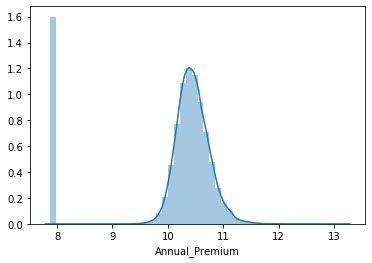

In [90]:
sns.distplot(train_set['Annual_Premium'])

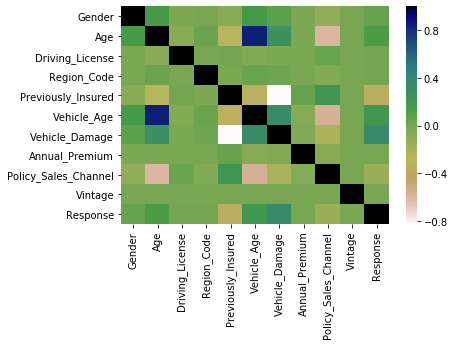

In [91]:
corrDf = train_set.corr()
sns.heatmap(corrDf, xticklabels = corrDf.columns, yticklabels = corrDf.columns, cmap = 'gist_earth_r')

In [100]:
train_set.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,3.784190,1,28.0,0,3.0,1,10.607921,26.0,217,1
1,2,4.330733,1,3.0,0,2.0,0,10.420375,26.0,183,0
2,2,3.850148,1,28.0,0,3.0,1,10.553049,26.0,27,1
3,2,3.044522,1,11.0,1,1.0,0,10.261826,152.0,203,0
4,1,3.367296,1,41.0,1,1.0,0,10.221796,152.0,39,0
5,1,3.178054,1,33.0,0,1.0,1,7.874739,160.0,176,0
6,2,3.135494,1,11.0,0,1.0,1,10.059080,152.0,249,0
7,1,4.025352,1,28.0,0,2.0,1,10.374459,26.0,72,1
8,1,3.178054,1,3.0,1,1.0,0,10.226259,152.0,28,0
9,1,3.465736,1,6.0,1,1.0,0,10.267123,152.0,80,0


# Outlier Detection

In [113]:
def OutlierDetection(train_set, variable):
    for col in variable:
        Q1 = np.percentile(train_set[col],25)
        Q3 = np.percentile(train_set[col],75)
        IQR = Q3 - Q1
        train_set = train_set[(((train_set[col])>(Q1-(1.5*IQR))) | ((train_set[col])>(Q3+1.5*IQR)))]
        return train_set

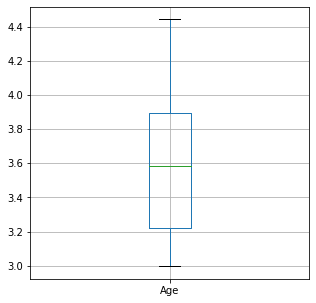

In [106]:
plt.figure(figsize = (5,5))
boxplot = train_set.boxplot(column=['Age'])

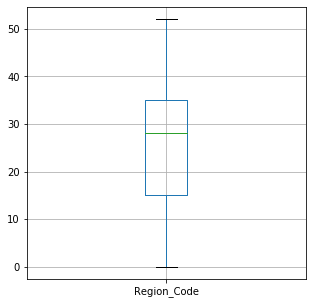

In [108]:
plt.figure(figsize = (5,5))
boxplot = train_set.boxplot(column=['Region_Code'])

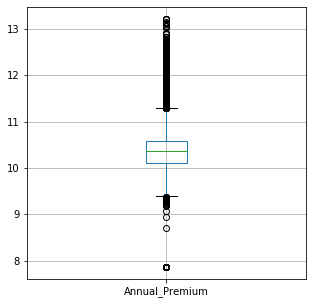

In [109]:
plt.figure(figsize = (5,5))
boxplot = train_set.boxplot(column=['Annual_Premium'])

In [114]:
train_set = OutlierDetection(train_set,['Annual_Premium'])

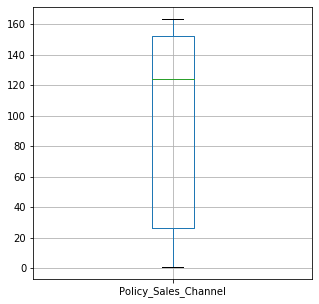

In [115]:
plt.figure(figsize = (5,5))
boxplot = train_set.boxplot(column=['Policy_Sales_Channel'])

In [120]:
test_set.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,2,3.218876,1,11.0,1,1.0,0,10.485312,152.0,53
1,2,3.688879,1,28.0,0,2.0,1,10.427091,7.0,111
2,2,3.850148,1,28.0,0,2.0,1,10.597884,124.0,199
3,2,3.178054,1,27.0,1,1.0,1,10.528249,152.0,187
4,2,3.295837,1,28.0,1,1.0,0,10.986935,152.0,297
5,2,3.091042,1,30.0,1,1.0,0,10.601796,152.0,266
6,1,3.931826,1,37.0,1,2.0,0,10.599580,26.0,107
7,2,3.218876,1,41.0,1,1.0,0,10.059422,152.0,232
8,2,3.737670,1,41.0,0,2.0,1,7.874739,26.0,277
9,1,3.610918,1,12.0,1,2.0,0,10.208174,124.0,133


In [ ]:
train_set.head()

# Splitting

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
Train, Test = train_test_split(train_set, train_size=0.8, random_state = 123)

In [126]:
Train_X = Train.drop(['Response'], axis = 1).copy()
Train_Y = Train['Response'].copy()
Test_X = Test.drop(['Response'], axis = 1).copy()
Test_Y = Test['Response'].copy()

## Smote

In [127]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,ratio=0.8) 
Train_X1, Train_Y1 = sm.fit_sample(Train_X, Train_Y.ravel()) 
Train_X1=pd.DataFrame(Train_X1,columns=Train_X.columns)
np.bincount(Train_Y1)

array([222327, 177861], dtype=int64)

## Model evaluation


In [130]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [136]:
def model_validation(Y,Pred,CM):
    ML_Accuracy=(sum(np.diag(CM))/Y.shape[0])*100
    ML_Precision=precision_score(Y, Pred)*100
    ML_Recall=recall_score(Y, Pred)*100
    ML_F1score=f1_score(Y, Pred)*100
    print("Accuracy : ", ML_Accuracy)
    print('Precision : ', ML_Precision)
    print('Recall : ', ML_Recall)
    print('F1_Score : ', ML_F1score)

## Model Building

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
M1_RF1 = RandomForestClassifier(random_state=123, n_estimators = 25, 
                               max_features = 5, min_samples_leaf = 500).fit(Train_X1, Train_Y1)

In [185]:
Test_Pred1 = M1_RF1.predict(Test_X)

In [186]:
Confusion_Mat1 = confusion_matrix( Test_Pred1,Test_Y) 
Confusion_Mat1

array([[49886,  5161],
       [ 5786,  2408]], dtype=int64)

In [137]:
model_validation(Test_Y,Test_Pred1,Confusion_Mat1)

Accuracy :  78.64992647175092
Precision :  32.493360873413984
Recall :  72.74408772625182
F1_Score :  44.92126947866525


In [138]:
from sklearn.metrics import roc_auc_score

In [139]:
roc_auc_score(Test_Y,Test_Pred1)

0.7609847725872873

### Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
M1_DF1 = DecisionTreeClassifier(random_state=123).fit(Train_X1, Train_Y1)

In [155]:
Test_Pred_DF = M1_DF1.predict(Test_X)

In [156]:
Confusion_Mat_DF = confusion_matrix(Test_Pred_DF,Test_Y) 
Confusion_Mat_DF

array([[49886,  5161],
       [ 5786,  2408]], dtype=int64)

In [157]:
model_validation(Test_Y,Test_Pred1,Confusion_Mat_DF)

Accuracy :  82.69002703942063
Precision :  32.493360873413984
Recall :  72.74408772625182
F1_Score :  44.92126947866525


In [168]:
roc_auc_score(Test_Y,Test_Pred_DF)

0.6071048091523591

In [187]:
test_set_pred = M1_RF1.predict(test_set)

### Submission

In [178]:
np.array(sub_id)

In [179]:
abc.shape

(127037,)

In [188]:
np.array(test_set_pred)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
test_set_pred.shape

(127037,)

In [190]:
Submission = pd.DataFrame({ 'id': np.array(sub_id), 'Response': np.array(test_set_pred) })

In [193]:
Submission.to_csv("Submission.csv", index=False)

In [197]:
x = 123